# <center> Experimento del Gap en diodos de silicio y germanio </center>
   

#### El objetivo de este notebook es presentar el paso a paso del análisis de datos para calcular el gap de energía de la información obtenido a tráves de multisim. 

#### Una vez realizado el barrido de temperatura uno importará los datos obtenidos de temperatura y voltaje. Para facilitar el análisis se eliminó, directamente en el archivo, los carácteres que no corresponden al valor de la temperatura. 

#### A continuación importamos las librerías necesarias con la cuales trabajaremos

In [2]:
import matplotlib.pyplot as plt  # librería para graficar
import numpy as np               # librería para vectorizar y analizar datos
import pandas as pd              # librería para manipular datos 
from scipy import optimize       # librería para ajustar curvas a serie de datos

#### A continuación importamos los archivos con los cuales trabajaremos. En este caso utilizamos el método read_excel de pandas, este método solo es válido para archivos "xlsx". Si cuenta con un archivo de excel diferentes como lo es .csv, uno tendrá que utilizar pd.read_csv( ). Dentro de los parántesis se escribirá el nombre del archivo, muy importante, entre comillas.

In [3]:
data = pd.read_excel("temperatura.xlsx") # Importamos nuestros archivos de excel
data2 = pd.read_excel("silicio.xlsx")

#### En la siguiente celda utilizamos rename para renombrar, en este caso, el nombre de nuestras columnas . Muy importante dejar inplace=True para guardar los cambios en el cuadro.

In [4]:
data.rename(columns={"Variable, Temperature setting": "Temperatura" , "Operating point value":"Voltaje" }, inplace = True)
data2.rename(columns={"Variable, Temperature setting": "Temperatura" , "Operating point value":"Voltaje" }, inplace = True)

#### Mostramos los primeros 5 datos de nuestro cuadro con el método head() podemos mostrar los últimos 5 con el método tail(). Si queremos ver los primero o últimos "n" datos podemos utilizar head(n), tail(n)

In [5]:
data.head()

,Temperatura,Voltaje
0,0,0.444505
1,1,0.441809
2,2,0.439113
3,3,0.436416
4,4,0.433719


# 1N4148

#### En la siguiente celda se eliminan aquellos datos que no representan el comportamiento lineal. Además eliminaremos los datos para temperaturas pares, esto para no toner un sobre ajuste de la recta.

In [6]:
for i in range(85,101) :     
        data.drop([i], inplace = True)
        
for i in range(0,85):
    if i%2 != 0:
        data.drop([i], inplace = True)

#### Con plt.scatter crearemos un gráfico de dispersión. En este caso necesitamos especificar los datos que se tomarán para "x" y "y". Además utilizaremos marker para especificar la forma de los puntos. Por otro lado plt.xlabel y plt.ylabel son utilizados para nombrar los ejes.

Text(0, 0.5, 'Temperature en C ° ')

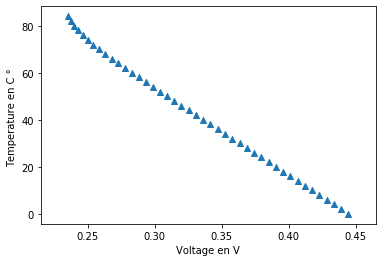

In [7]:
plt.scatter(x = data['Voltaje'], y = data['Temperatura'], marker = '^')
plt.xlabel('Voltage en V')
plt.ylabel('Temperature en C \N{DEGREE SIGN} ')

####  Para facilitar el ajuste de la recta diviremos nuestros datos en dos x_data que contendra el voltaje y y_data que contendrá los datos de temperatura 

In [8]:
x_data = data['Voltaje']
y_data = data['Temperatura']

#### Definimos una función que contendrá los parámetros  a, t, b los cuales serán arreglados para formar una recta. El párametro a representará la pendiente y b la ordenada al origen

In [9]:
def f(t, a, b):
    return a*t + b

#### Utilzamos en método optimize.curve_fit para encontrar los parámetros que se ajustan a nuestros datos.  Para utilizar esté método neceistamos 3 parámetros f que será la función a ajustar, los datos del eje x y los datos del eje y.  Params es un vector contendrá los parámetros a, b del ajuste. params_cov nos dará los datos de la matriz de covarianza.  

In [11]:
#Ajustamos nuestra recta y encontramos los parámetros a(pendiente) y b(ordenada al origen)

params, params_cov= optimize.curve_fit(f, x_data, y_data)
a = params[0]
b = params[1]

print(a, "," ,b)

-384.71996605105863 , 170.03183636357983


#### Creamos una nueva gráfica, además de contar con el gráfico de dispersión tendremos la curva que ajustamos. Dicha curva será graficada con plt.plot, el cual contiene los datos "x" y "y", en este caso  "y" es el conjunto de datos tales que se les aplica la función $f(x) = -384.72x + 170 $

#### Igualmente utilizamos xlabel y ylabel para nombrar nuestros ejes, annotate para especificar a que gráfica corresponde en este caso "Diodo de silicio 1N4148". Con la opción plt.savefig("Silicio") exportamos la imagen en formato pgn y tendré el nombre Silicio.png

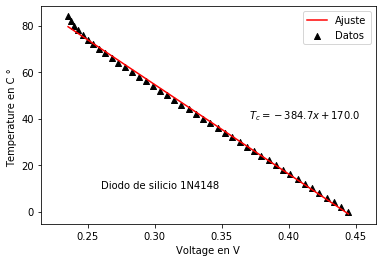

In [10]:
plt.scatter(x_data, y_data, label='Datos' ,color = 'black', marker = '^')
plt.plot(x_data, f(x_data, a, b), label='Ajuste',  color = 'red' )
plt.annotate(r'$T_c =-384.7x+170.0$', (0.370, 40))
plt.xlabel('Voltage en V')
plt.ylabel('Temperature en C \N{DEGREE SIGN}')
plt.annotate(r'Diodo de silicio 1N4148', (0.26, 10))
plt.legend(loc='best')
plt.savefig('Silicio')

#### Realizamos el cálculo del gap de energía 

In [11]:
# Realizamos operación para encontrar el gap de energía

E_g = -(b + 273.15)/a
print('Gap de energía :', E_g)

Gap de energía : 1.151959543229847


# AA112

#### En la siguiente celda se eliminan aquellos datos que no representan el comportamiento lineal. Además eliminaremos los datos para temperaturas pares, esto para no toner un sobre ajuste de la recta.

In [12]:
for i in range(47,101) :     
        data2.drop([i], inplace = True)
        
        
for i in range(0,46):
    if i%2 != 0:
        data2.drop([i], inplace = True)

#### En la siguiente celda se eliminan aquellos datos que no representan el comportamiento lineal. Además eliminaremos los datos para temperaturas pares, esto para no toner un sobre ajuste de la recta.

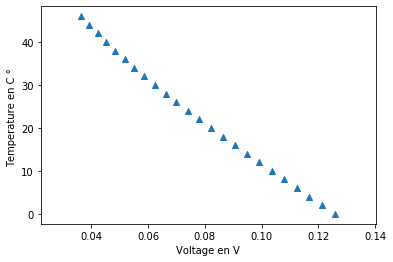

In [13]:
plt.scatter(x = data2['Voltaje'], y = data2['Temperatura'], marker = '^')
plt.xlabel('Voltage en V')
plt.ylabel('Temperature en C \N{DEGREE SIGN} ')
plt.savefig('Grafica')

####  Para facilitar el ajuste de la recta diviremos nuestros datos en dos x_data que contendra el voltaje y y_data que contendrá los datos de temperatura 

In [14]:
x_data2 = data2['Voltaje']
y_data2 = data2['Temperatura']

#### Utilzamos en método optimize.curve_fit para encontrar los parámetros que se ajustan a nuestros datos.  Para utilizar esté método neceistamos 3 parámetros f que será la función a ajustar, los datos del eje x y los datos del eje y.  Params es un vector contendrá los parámetros a, b del ajuste. params_cov nos dará los datos de la matriz de covarianza.

In [15]:
params2, params_cov2= optimize.curve_fit(f, x_data2, y_data2)
a_2 = params2[0]
b_2 = params2[1]

print(a_2, "," ,b_2)

-505.80289894871765 , 62.38726205124148


#### Creamos una nueva gráfica, además de contar con el gráfico de dispersión tendremos la curva que ajustamos. Dicha curva será graficada con plt.plot, el cual contiene los datos "x" y "y", en este caso  "y" es el conjunto de datos tales que se les aplica la función $f(x) = -505.80x + 62.39 $

#### Igualmente utilizamos xlabel y ylabel para nombrar nuestros ejes, annotate para especificar a que gráfica corresponde en este caso "Diodo de silicio AA112". Con la opción plt.savefig("germiano") exportamos la imagen en formato pgn y tendré el nombre Silicio.png

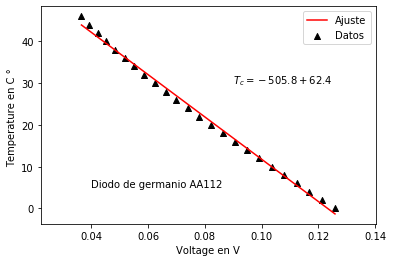

In [16]:
plt.scatter(x_data2, y_data2, label='Datos' ,color = 'black', marker = '^')
plt.plot(x_data2, f(x_data2, a_2, b_2), label='Ajuste',  color = 'red' )
plt.annotate(r'$T_c =-505.8 + 62.4$', (0.09, 30))
plt.annotate(r'Diodo de germanio AA112', (0.04, 5))
plt.xlabel('Voltage en V')
plt.ylabel('Temperature en C \N{DEGREE SIGN} ')
plt.legend(loc='best')
plt.savefig('germanio')


#### Realizamos el cálculo del gap de energía 

In [17]:
E_g2 = -(b_2 + 273.15)/a_2
print('Gap de energía :', E_g2)

Gap de energía : 0.663375521865605
